# Chapter 4 Linear Models for Classification


In [2]:
options(warn=-1)

library(arrangements)
library(corpcor)
library( dplyr)
library(ramify)
library( graphics)
library(Rfast)
library(textir)

## 4.1 Discriminant Functions

### 4.1.3 Least squares for classification

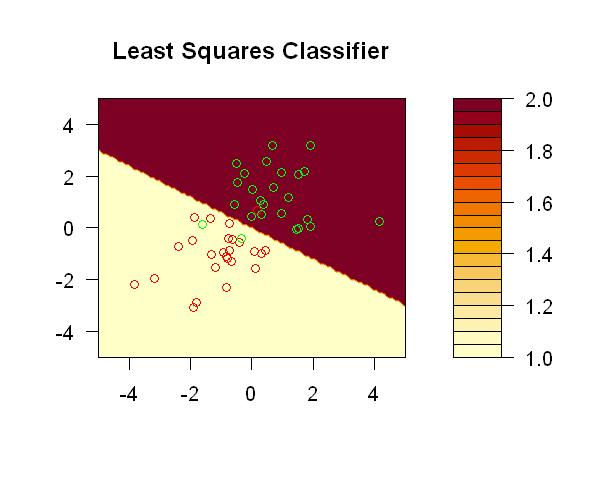

In [13]:
#　function PolynomialFeature
PolynomialFeature <- function(X, degree){
        feature <- matrix(rep(1,nrow(X)),nrow(X))
        for (i in 1:degree){
                #i=1
                col.index <- combinations(ncol(X), i,replace = TRUE)
                # print(paste("degree", i, sep=""))
                
                for (j in 1:nrow(col.index)){
                        colcombination = col.index[j,]
                        select.feature = matrix(X[,colcombination],nrow(X))
                        m1 = apply(select.feature,1,prod)
                        feature <- cbind(feature, matrix(m1,nrow(X)))
                        #print(feature)
                }
        }
        return(feature)
}

#　function create data

Generate_data <- function(add_outliers=F, add_class=F){
        x0 <- matrix(rnorm(50),25,2) - 1
        x1 <- matrix(rnorm(50),25,2) + 1
        
        if (add_outliers){
                m1 <- matrix(rnorm(10),5,2) 
                outliers = matrix(c(5,10),1,2)
                x_1 <- sweep(m1, 2, outliers,"+")
                predictor <- rbind(x0,x1,x_1)
                responser <- c(rep(0,25),rep(1,30))
                result <- list("responser"=responser, "predictor"=predictor)
                return(result)
        }
        if (add_class){
                x2 <- matrix(rnorm(50),25,2) + 3 
                predictor <- rbind(x0,x1,x2)
                responser <- c(rep(0,25),rep(1,25), rep(2,25))
                result <- list("responser"=responser, "predictor"=predictor)
                return(result)
        }
        else {
                predictor <- rbind(x0,x1)
                responser <-c(rep(0,25),rep(1,25))
                result <- list("responser"=responser, "predictor"=predictor)
                return(result)
        }
}




Onehot_encode <- function(X){
        mydata <-matrix(0, length(X),length(unique(X)))
        unique_value = unique(X)
        colnames(mydata) <- paste("label", unique_value, sep = "_")
        
        j=1
        for(i in unique(X)){
                mydata[,j] <- ifelse(X == i, 1, 0)
                j = j+1}
        return(mydata)
}


LeastSquaresClassifier_fit <- function(X, t){
        Onehot_t = Onehot_encode(t)
        W = pseudoinverse(X) %*% Onehot_t
        return(W)
        
}

LeastSquaresClassifier_classify <- function(X, W){
        argmax(X %*% W, rows = T)
        
}

#　create data
x_train　<- Generate_data()$predictor
y_train  <- Generate_data()$responser
x_test <- expand.grid(s.1 = seq(-5, 5, length.out=100), 
                      s.2 = seq(-5, 5, length.out=100))

X_train = PolynomialFeature(x_train,1)
X_test = PolynomialFeature(x_test,1)

W_trn = LeastSquaresClassifier_fit (X_train, y_train)
y_pred = LeastSquaresClassifier_classify(X_test, W_trn)
y_pred = matrix(y_pred, 100, 100)

options(repr.plot.width=5,repr.plot.height=4)
filled.contour(x = seq(-5, 5, length.out=100), y = seq(-5, 5, length.out=100), 
               z = y_pred, plot.title = title(main = "Least Squares Classifier"),
               plot.axes = { axis(1); axis(2); points(x_train,col = ifelse(y_train == 1,'green','red'))})



### Logistic Regression Classifier

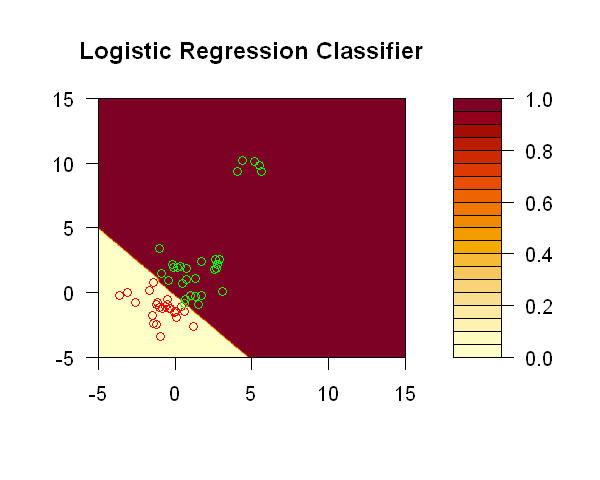

In [14]:
#　create data
x_train　<- Generate_data(add_outliers=T)$predictor
y_train  <- Generate_data(add_outliers=T)$responser
x_test <- expand.grid(s.1 = seq(-5, 15, length.out=100), 
                      s.2 = seq(-5, 15, length.out=100))

X_train = PolynomialFeature(x_train,1)
X_test = PolynomialFeature(x_test,1)

# np.tanh(a * 0.5) * 0.5 + 0.5
# Logistic Regression function
LogisticRegression_fit <- function(X, t, max_iter=100){
        w <- rep(0, ncol(X))
        for (i in 1:max_iter){
                w_prev = w
                y = tanh(X %*% w * 0.5) * 0.5 + 0.5
                grad = t(X) %*% (y - t)
                p1 = sweep(X, 1, y,"*")
                p2 = sweep(p1, 1, (1 - y),"*")
                hessian =  t(p2) %*% X
                w = w - solve(hessian, grad)
                if (isTRUE(all.equal(w, w_prev)) ) break
        }
       return(w)
}




LogisticRegression_prob <- function(X, w){
        # probability of input belonging class 1
        tanh(X %*% w * 0.5) * 0.5 + 0.5
}

LogisticRegression_classify <- function(X, w, threshold = 0.5){
        ifelse(LogisticRegression_prob(X, w) > threshold, 1, 0)
}

#
# fit logistic on data
w = LogisticRegression_fit (X_train, y_train, max_iter=100)
y_pred = LogisticRegression_classify(X_test, w, threshold = 0.5)

y_pred = matrix(y_pred, 100, 100)
filled.contour(x = seq(-5, 15, length.out=100), y = seq(-5, 15, length.out=100), 
               z = y_pred, plot.title = title(main = "Logistic Regression Classifier"),
               plot.axes = { axis(1); axis(2); 
                       points(x_train,col = ifelse(y_train == 1,'green','red'))})




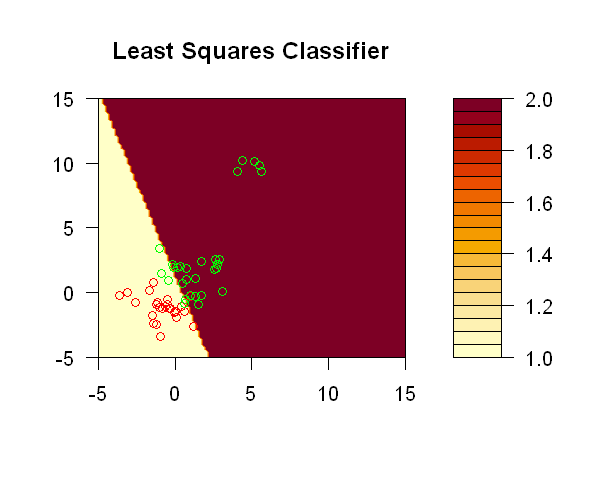

In [15]:
# fit Least Squares Classifier on data

W_trn = LeastSquaresClassifier_fit (X_train, y_train)
y_pred = LeastSquaresClassifier_classify(X_test, W_trn)
y_pred = matrix(y_pred, 100, 100)


filled.contour(x = seq(-5, 15, length.out=100), y = seq(-5, 15, length.out=100), 
               z = y_pred, plot.title = title(main = "Least Squares Classifier"),
               plot.axes = { axis(1); axis(2); points(x_train,col = ifelse(y_train == 1,'green','red'))})

### multinomial logistic regression

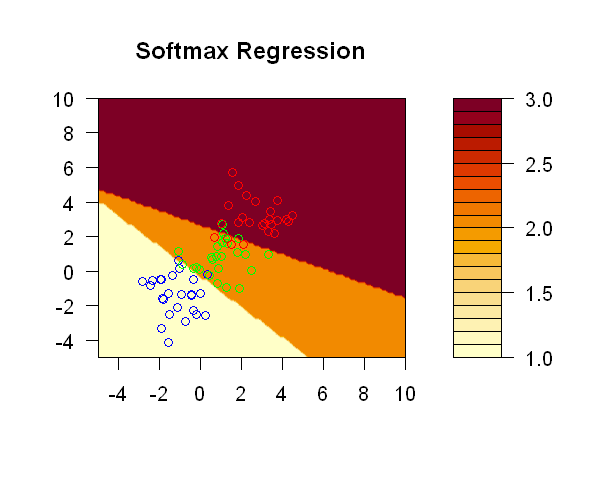

In [16]:

x_train　<- Generate_data(add_class=T)$predictor
y_train  <- Generate_data(add_class=T)$responser
x_test <- expand.grid(s.1 = seq(-5, 10, length.out=100), 
                      s.2 = seq(-5, 10, length.out=100))

X_train = PolynomialFeature(x_train,1)
X_test = PolynomialFeature(x_test,1)

softmax <- function(a){
        #a=X
        a_max <- matrix(apply(X=a, MARGIN=1, FUN=max))
        exp_a <- exp(sweep(a, 1, a_max,"-"))
        return(exp_a / rowSums(exp_a))
}


SoftmaxReg_fit <- function(X, t, max_iter=100, learning_rate=0.1){
        
        t = Onehot_encode(t)
        n_classes = ncol(t)
        W = matrix(0, ncol(X), n_classes)
        for (i in 1: max_iter){
                W_prev  = W
                y = softmax(X %*% W)
                grad = t(X) %*% (y - t)
                W = W - learning_rate * grad
                if (isTRUE(all.equal(W, W_prev)) ) break
        }
        return(W)
}


SoftmaxReg_classify <- function(X, W){
        
        prob = softmax(X %*% W)
        class_index <- max.col(prob, 'first')
        return(class_index)
}

Soft_w = SoftmaxReg_fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y_pred = SoftmaxReg_classify(X_test,Soft_w)
y_pred = matrix(y_pred, 100, 100)


filled.contour(x = seq(-5, 10, length.out=100), y = seq(-5, 10, length.out=100), 
               z = y_pred, plot.title = title(main = "Softmax Regression"),
               plot.axes = { axis(1); axis(2); 
                       points(x_train,col = ifelse(y_train ==1, 'green', 
                                                   ifelse(y_train ==2, 'red', 'blue')))})


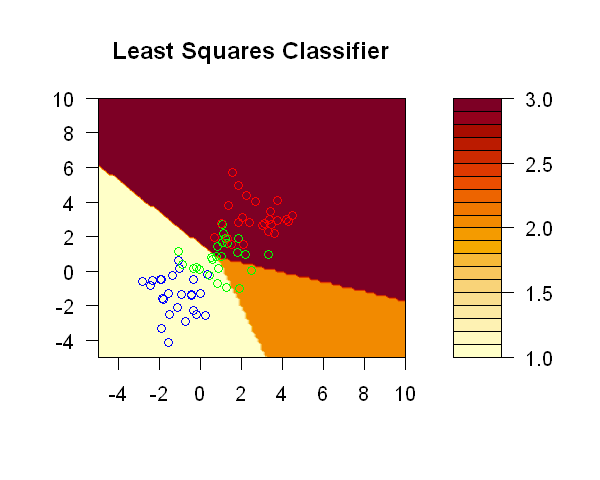

In [17]:
# fit Least Squares Classifier on data

W_trn = LeastSquaresClassifier_fit (X_train, y_train)
y_pred = LeastSquaresClassifier_classify(X_test, W_trn)
y_pred = matrix(y_pred, 100, 100)


filled.contour(x = seq(-5, 10, length.out=100), y = seq(-5, 10, length.out=100), 
               z = y_pred, plot.title = title(main = "Least Squares Classifier"),
               plot.axes = { axis(1); axis(2); 
                       points(x_train,col = ifelse(y_train ==1, 'green', 
                                                   ifelse(y_train ==2, 'red', 'blue')))})

### 4.1.4 Fisher's linear discriminant

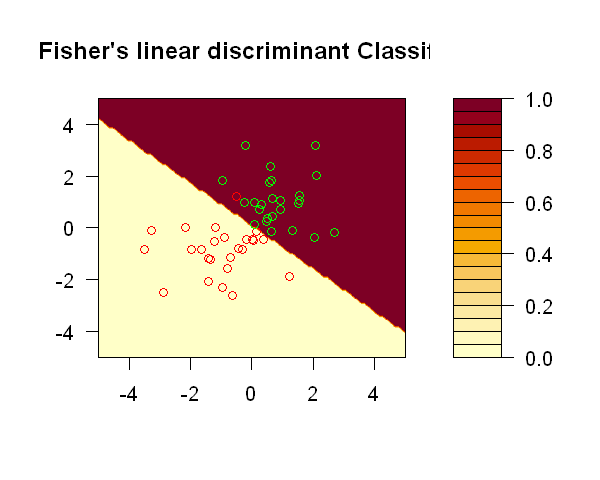

In [18]:
# Fisher's linear discriminant
# generate data
x_train　<- Generate_data()$predictor
y_train  <- Generate_data()$responser
x_test <- expand.grid(s.1 = seq(-5, 5, length.out=100), 
                      s.2 = seq(-5, 5, length.out=100))


norm_vec <- function(x) sqrt(sum(x^2))

FishersLD_fit <- function(X, t){
        X0 = X[t == 0, ]
        X1 = X[t == 1 ,]
        m0 = colMeans(X0)
        m1 = colMeans(X1)
        cov_inclass = cov(X0) + cov(X1)
        w = solve(cov_inclass, m1 - m0)
        w = w / clip(norm_vec(w), .min = 1e-10)
        
        g0 = X0 %*% w
        g0.var = colVars(g0)
        g0.mu = colMeans(g0)
        g1 = X1 %*% w
        g1.var = colVars(g1)
        g1.mu = colMeans(g1)
        
        p0 = g1.var - g0.var
        p1 = 2 * (g0.var * g1.mu - g1.var * g0.mu)
        p2 = g1.var * g0.mu ** 2 - g0.var * g1.mu ** 2- 
                g1.var * g0.var * log(g1.var / g0.var)
        root = Re(polyroot(c(p2,p1,p0)))
        cond1 <- (root[1] > g0.mu & root[1] < g1.mu) | (root[1] > g1.mu & root[1] < g0.mu)
        if (cond1) {
                threshold = root[1]
        } else {threshold = root[2]}
        
        w = matrix(w,nrow=2)
        result <- list("w"=w, "threshold"=threshold)
        return(result)
}

FishersLD_classify <- function(X, w, threshold){
        ifelse(X %*% w > threshold, 1, 0)
}



FLD.fit <- FishersLD_fit(x_train, y_train)

y_pred = FishersLD_classify ( as.matrix(x_test), FLD.fit$w, FLD.fit$threshold)
y_pred = matrix(y_pred, 100, 100)


filled.contour(x = seq(-5, 5, length.out=100), y = seq(-5, 5, length.out=100), 
               z = y_pred, plot.title = title(main = "Fisher's linear discriminant Classifier"),
               plot.axes = { axis(1); axis(2); 
                       points(x_train,col = ifelse(y_train == 1,'green','red'))})


## 4.3 Probabilistic Discriminative Models

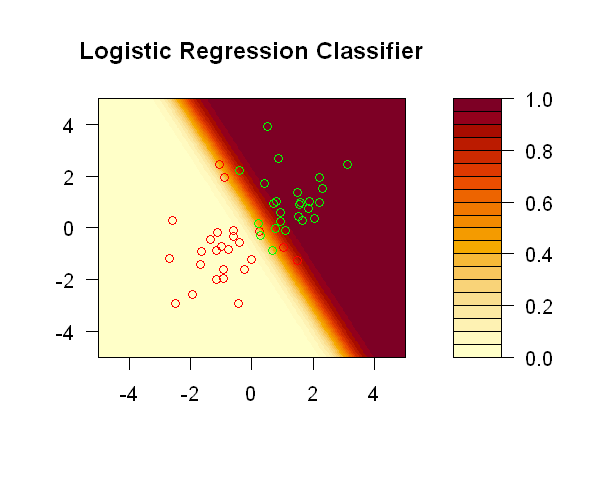

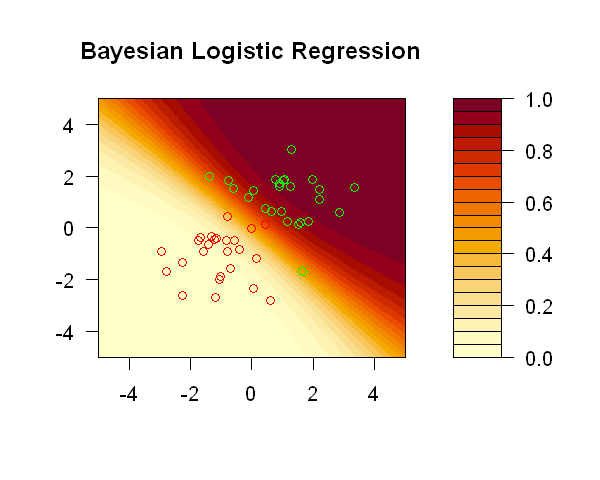

In [19]:
x_train　<- Generate_data()$predictor
y_train  <- Generate_data()$responser
x_test <- expand.grid(s.1 = seq(-5, 5, length.out=100), 
                      s.2 = seq(-5, 5, length.out=100))


X_train = PolynomialFeature(x_train,1)
X_test = PolynomialFeature(x_test,1)

w = LogisticRegression_fit (X_train, y_train, max_iter=100)
y_pred = LogisticRegression_prob (X_test, w)


y_pred = matrix(y_pred, 100, 100)
filled.contour(x = seq(-5, 5, length.out=100), y = seq(-5, 5, length.out=100), 
               z = y_pred, plot.title = title(main = "Logistic Regression Classifier"),
               plot.axes = { axis(1); axis(2); 
                       points(x_train,col = ifelse(y_train == 1,'green','red'))})


# Bayesian Logistic Regression

BayesLogistic_fit <- function(X, t, alpha, max_iter=100){
        
        w = rep(0, ncol(X))
        eye = diag(ncol(X))
        w_mean = w
        w_precision = alpha * eye
        
        for (i in 1:max_iter){
                w_prev = w
                y = tanh(X %*% w * 0.5) * 0.5 + 0.5
                grad = t(X) %*% (y - t) + w_precision %*% (w - w_mean)
                p1 = sweep(X, 1, y,"*")
                p2 = sweep(p1, 1, (1 - y),"*")
                hessian =  t(p2) %*% X + w_precision
                w = w - solve(hessian, grad)
                if (isTRUE(all.equal(w, w_prev)) ) break
        }
        w_mean = w
        w_precision = hessian
        
        result <- list("w_mean"=w_mean, "w_precision"=w_precision)
        return(result)
}



BayesLogistic_prob <- function(X, w_mean, w_precision){
        mu_a = X %*%  w_mean
        var_r = t(solve(w_precision, t(X))) * X
        var_a = rowSums(var_r)
        proba = mu_a / sqrt(1 + pi * var_a / 8)
        result = tanh(proba * 0.5) * 0.5 + 0.5
        return(result)
}

x_train　<- Generate_data()$predictor
y_train  <- Generate_data()$responser
x_test <- expand.grid(s.1 = seq(-5, 5, length.out=100), 
                      s.2 = seq(-5, 5, length.out=100))


X_train = PolynomialFeature(x_train,1)
X_test = PolynomialFeature(x_test,1)

BL.fit <- BayesLogistic_fit(X_train, y_train, alpha=1, max_iter=1000)

y_pred = BayesLogistic_prob(X_test, BL.fit$w_mean, BL.fit$w_precision)


y_pred = matrix(y_pred, 100, 100)
filled.contour(x = seq(-5, 5, length.out=100), y = seq(-5, 5, length.out=100), 
               z = y_pred, plot.title = title(main = "Bayesian Logistic Regression"),
               plot.axes = { axis(1); axis(2); 
                       points(x_train,col = ifelse(y_train == 1,'green','red'))})






